In [1]:
import xgboost as xgb
import matplotlib as plt
from sklearn import metrics, model_selection
from xgboost.sklearn import XGBClassifier
from xgboost import DMatrix
from sklearn.datasets import load_svmlight_file
from sklearn.datasets import dump_svmlight_file
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from graphviz import Digraph
from matplotlib import pyplot

In [2]:
data = open("/Users/apple/Downloads/libsvm_0_8400", 'r')

# converting data into readable fomat
dataread = data.readlines()

# creating files for training and test spliting 
data_train = open("/Users/apple/Downloads/libsvm15-train-8400.txt", 'w')
data_test = open("/Users/apple/Downloads/libsvm15-test-8400.txt", 'w')

# spliting dataset into test and training

data_train_out = []
data_test_out = []

for line in range(0, int(len(dataread)*0.8)):
    data_train_out.append(dataread[line])
for line in range(int(len(dataread)*0.8), len(dataread)):
    data_test_out.append(dataread[line])

for item in data_train_out:
    data_train.write(item)

for item in data_test_out:
    data_test.write(item)
data_train.close()
data_test.close()

In [3]:
train = xgb.DMatrix("/Users/apple/Downloads/libsvm15-train-8400.txt")

test = xgb.DMatrix("/Users/apple/Downloads/libsvm15-test-8400.txt")

[12:03:53] 3302629x47 matrix with 151920934 entries loaded from /Users/apple/Downloads/libsvm15-train-8400.txt
[12:03:54] 825658x47 matrix with 37980268 entries loaded from /Users/apple/Downloads/libsvm15-test-8400.txt


[0]	train-ndcg@1:0.499621	train-ndcg@5:0.601542	train-ndcg@10:0.634393	train-ndcg@20:0.656411	train-ndcg@50:0.67251	train-ndcg@100:0.678737	test-ndcg@1:0.475182	test-ndcg@5:0.581162	test-ndcg@10:0.615696	test-ndcg@20:0.638997	test-ndcg@50:0.656761	test-ndcg@100:0.66252
[1]	train-ndcg@1:0.507501	train-ndcg@5:0.617818	train-ndcg@10:0.648449	train-ndcg@20:0.670023	train-ndcg@50:0.68446	train-ndcg@100:0.690271	test-ndcg@1:0.483051	test-ndcg@5:0.593566	test-ndcg@10:0.630151	test-ndcg@20:0.65464	test-ndcg@50:0.667865	test-ndcg@100:0.673294
[2]	train-ndcg@1:0.51129	train-ndcg@5:0.620437	train-ndcg@10:0.650754	train-ndcg@20:0.67281	train-ndcg@50:0.686876	train-ndcg@100:0.692653	test-ndcg@1:0.489709	test-ndcg@5:0.595096	test-ndcg@10:0.631211	test-ndcg@20:0.655986	test-ndcg@50:0.671158	test-ndcg@100:0.676456
[3]	train-ndcg@1:0.514169	train-ndcg@5:0.624488	train-ndcg@10:0.656079	train-ndcg@20:0.677354	train-ndcg@50:0.691255	train-ndcg@100:0.696785	test-ndcg@1:0.49092	test-ndcg@5:0.59781	test-ndcg

[31]	train-ndcg@1:0.547962	train-ndcg@5:0.659916	train-ndcg@10:0.691172	train-ndcg@20:0.709418	train-ndcg@50:0.721413	train-ndcg@100:0.725442	test-ndcg@1:0.515738	test-ndcg@5:0.633811	test-ndcg@10:0.667635	test-ndcg@20:0.688065	test-ndcg@50:0.701973	test-ndcg@100:0.706191
[32]	train-ndcg@1:0.550841	train-ndcg@5:0.661849	train-ndcg@10:0.692751	train-ndcg@20:0.711409	train-ndcg@50:0.723036	train-ndcg@100:0.727064	test-ndcg@1:0.513923	test-ndcg@5:0.633721	test-ndcg@10:0.667347	test-ndcg@20:0.688183	test-ndcg@50:0.701587	test-ndcg@100:0.705677
[33]	train-ndcg@1:0.551296	train-ndcg@5:0.661944	train-ndcg@10:0.693228	train-ndcg@20:0.712183	train-ndcg@50:0.723594	train-ndcg@100:0.727647	test-ndcg@1:0.514528	test-ndcg@5:0.635132	test-ndcg@10:0.668544	test-ndcg@20:0.689474	test-ndcg@50:0.703092	test-ndcg@100:0.707243
[34]	train-ndcg@1:0.552963	train-ndcg@5:0.662866	train-ndcg@10:0.694439	train-ndcg@20:0.713158	train-ndcg@50:0.724537	train-ndcg@100:0.72855	test-ndcg@1:0.518765	test-ndcg@5:0.63687

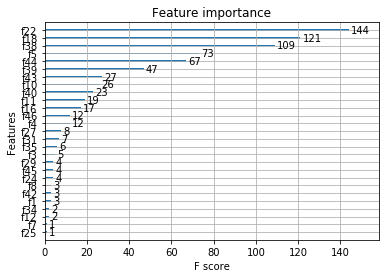

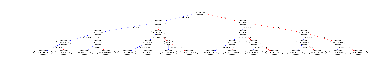

In [5]:
params = {'objective': 'rank:pairwise', 'learning_rate': 0.1,'gamma': 1.0, 'min_child_weight': 0.1,
          'max_depth': 4, 'n_estimators': 10}

# setting model evaluation metrics

params['eval_metric'] = ['ndcg@1','ndcg@5','ndcg@10','ndcg@20','ndcg@50','ndcg@100']

evallist = [ (train, 'train'), (test, 'test') ]

#training the model

num_round = 50
bst = xgb.train(params, train, num_round, evallist)


#passing feature indications as input to model via a text file with explained variable type
model = bst.get_dump(fmap='/Users/apple/Downloads/featmap15-5.txt', dump_format='json') 

#saving model 
bst.save_model('00055-8400.model')

#testing model
ypred = bst.predict(test)


#plotting the importance and trees
xgb.plot_importance(bst)

xgb.plot_tree(bst, num_trees= 5)

#putting data dump in output for json elastic format
with open('/Users/apple/Downloads/xgb-model-55-8400.json', 'w') as output:
    output.write('[' + ','.join(list(model)) + ']')
    output.close()